In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [26]:
from keras.datasets import cifar10
(X_train,y_train) ,(X_test,y_test) = cifar10.load_data()

In [3]:
y_test.shape

(10000, 1)

In [4]:
X_test.shape

(10000, 32, 32, 3)

[9]


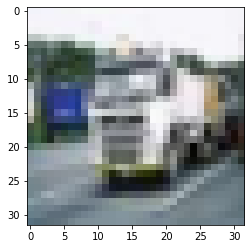

In [5]:
i =1000
plt.imshow(X_train[i])
print(y_train[i])

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


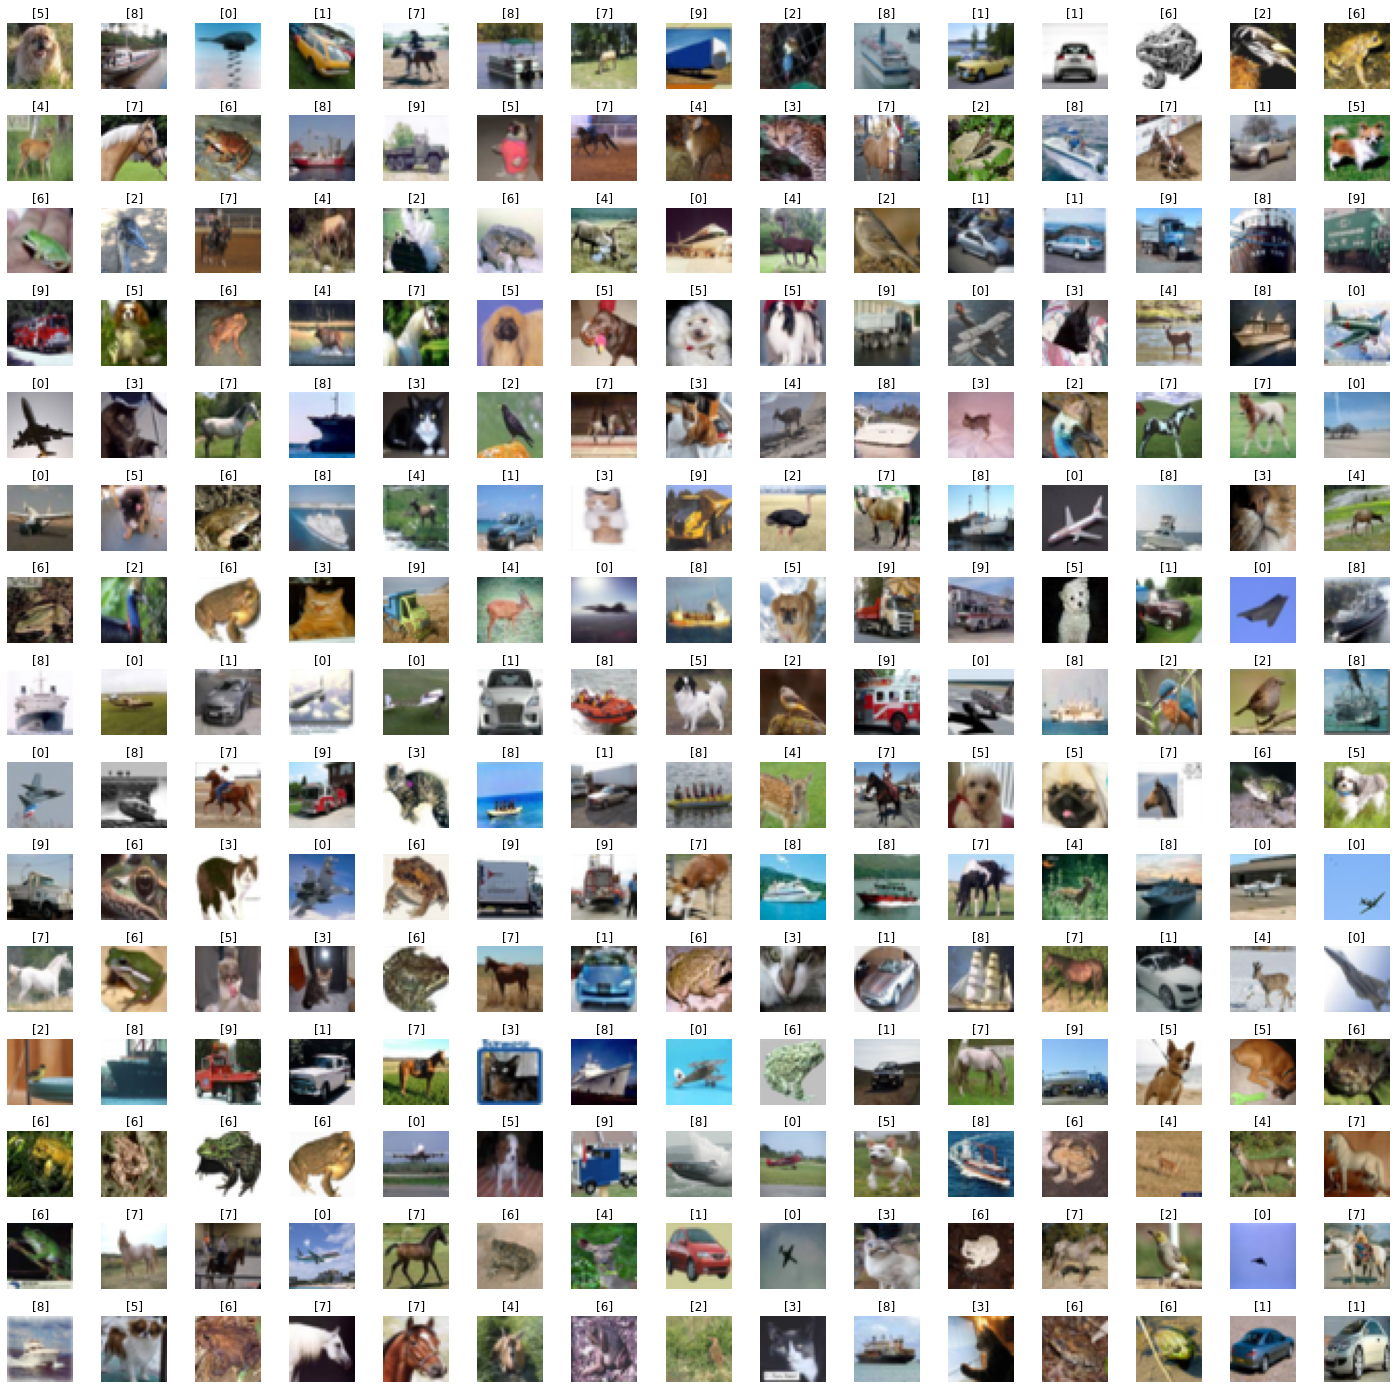

In [27]:
W_grid =15
L_grid =15

fig , axes = plt.subplots(L_grid,W_grid,figsize=(25,25))
axes = axes.ravel()

n_training =len(X_train)
for i in np.arange(0,L_grid * W_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4) 

In [28]:
X_train=X_train.astype('float32')
X_test =X_test.astype('float32')

In [29]:
import keras
y_train = keras.utils.to_categorical(y_train,10)

In [50]:
y_test= keras.utils.to_categorical(y_test,10)

In [51]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [31]:
X_train = X_train/255
X_test = X_test/255

In [12]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [32]:
Input_shape = X_train.shape[1:]

In [33]:
Input_shape

(32, 32, 3)

In [34]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [35]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape= Input_shape))
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
#maxpooling
cnn_model.add(MaxPooling2D(2,2))
#dropout 30% neurons
cnn_model.add(Dropout(0.3))


cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
#maxpooling
cnn_model.add(MaxPooling2D(2,2))
#dropout 30% neurons
cnn_model.add(Dropout(0.2))

#flattening

cnn_model.add(Flatten())

#full connected ntwk
cnn_model.add(Dense(units=512,activation='relu'))
#add another hidden layer
cnn_model.add(Dense(units=512,activation='relu'))
#output
cnn_model.add(Dense(units=10,activation='softmax')) #output 0 or 1 so softmax , as relu for continous


In [36]:
#compile
cnn_model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.RMSprop(lr=0.001),metrics=['accuracy'])

In [37]:
history = cnn_model.fit(X_train,y_train,batch_size=32,epochs=2,shuffle=True)

Epoch 1/2
1563/1563 [==============================] - 183s 117ms/step - loss: 1.5624 - accuracy: 0.4359
Epoch 2/2
1563/1563 [==============================] - 180s 115ms/step - loss: 1.1494 - accuracy: 0.5965


In [38]:
evaluation =cnn_model.evaluate(X_test,y_test)
print('Test Accuarcy {}'.format(evaluation[1]))

313/313 [==============================] - 9s 28ms/step - loss: 1.0491 - accuracy: 0.6401
Test Accuarcy 0.6401000022888184


In [39]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 1, 8, ..., 5, 1, 7])

In [40]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [41]:
y_test=y_test.argmax(1)

In [42]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

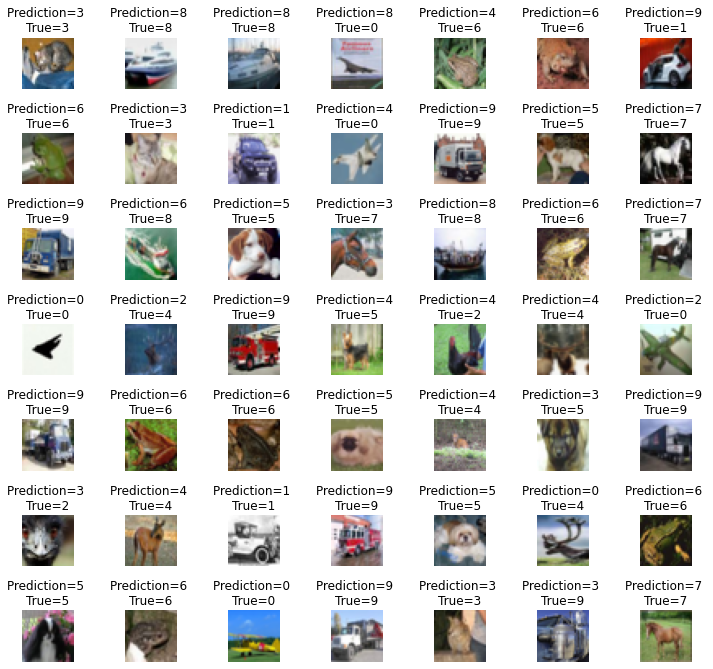

In [27]:
L =7
W=7
fig,axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()
for i in np.arange(0,L*W):
   axes[i].imshow(X_test[i])
   axes[i].set_title('Prediction={} \nTrue={}'.format(predicted_classes[i],y_test[i]))
   axes[i].axis('off')
plt.subplots_adjust(wspace=1)

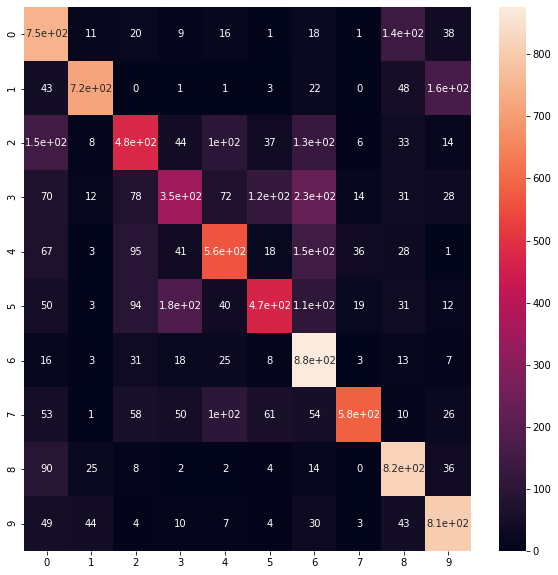

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,predicted_classes)
cm
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

In [32]:
#save model

import os
directory = os.path.join(os.getcwd(),'saved_models')
if not os.path.isdir(directory):
  os.makedirs(directory)
model_path=os.path.join(directory,'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

In [1]:
import keras
from keras.datasets import cifar10
(X_train,y_train), (X_test,y_test) = cifar10.load_data()


In [2]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [35]:
X_train.shape

(50000, 32, 32, 3)

In [3]:
from keras.preprocessing.image import ImageDataGenerator
dataget_train= ImageDataGenerator(rotation_range=90)
dataget_train.fit(X_train)

In [18]:
n =15 #8 images
X_train_sample = X_train[:n]
X_train_sample.shape

(15, 32, 32, 3)

In [11]:
from keras.preprocessing.image import ImageDataGenerator
dataget_train= ImageDataGenerator(rotation_range=90,horizontal_flip=True)
dataget_train.fit(X_train_sample)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


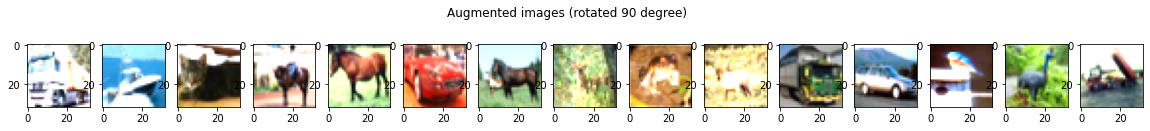

In [19]:
import matplotlib.pyplot as plt

from scipy.misc import toimage
fig = plt.figure(figsize=(20,2))
for x_batch in dataget_train.flow(X_train_sample,batch_size=n):
  for i in range(0,n):
     ax = fig.add_subplot(1,n, i +1)
     ax.imshow(toimage(x_batch[i]))
  fig.suptitle('Augmented images (rotated 90 degree)')
  plt.show()
  break;

In [17]:
from keras.preprocessing.image import ImageDataGenerator
dataget_train= ImageDataGenerator(brightness_range=(1,3))
dataget_train.fit(X_train_sample)

In [20]:
#model training using augmented dataset

datagen = ImageDataGenerator(rotation_range=90,width_shift_range=0.1,horizontal_flip=True,vertical_flip=True)    


In [21]:
datagen.fit(X_train)

In [44]:
cnn_model.fit_generator(datagen.flow(X_train,y_train,batch_size=32),epochs=2)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/2
1563/1563 [==============================] - 199s 127ms/step - loss: 1.6734 - accuracy: 0.3997
Epoch 2/2
1563/1563 [==============================] - 200s 128ms/step - loss: 1.5824 - accuracy: 0.4353


In [52]:
score = cnn_model.evaluate(X_test,y_test)


313/313 [==============================] - 9s 28ms/step - loss: 1.4246 - accuracy: 0.5314


In [46]:
 !pip uninstall scipy

 !pip install scipy==1.2.0

Uninstalling scipy-1.4.1:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/scipy-1.4.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/scipy/*
Proceed (y/n)? y
  Successfully uninstalled scipy-1.4.1
     |████████████████████████████████| 26.6MB 167kB/s 
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.2.0 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.2.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [44]:
!pip install scipy.misc

ERROR: Could not find a version that satisfies the requirement scipy.misc (from versions: none)
ERROR: No matching distribution found for scipy.misc
